In [10]:
from __future__ import print_function
import os

import numpy as np
from math import pi
import time
import datetime

from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from scipy.optimize import curve_fit

from astropy import convolution as conv

import pandas as pd
from pathlib import Path

%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 90

np.set_printoptions(threshold=np.nan)

%cd /home/andle/Documents/Python/met2_sensit18/

plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)

/home/andle/Documents/Python/met2_sensit18


In [11]:
# 0 t
# 2 u10
# 3 a10
# 8 u5
# 12 u2
# 16 T

In [12]:
#GET METTOWER DATA

startindex = 0
endindex   = -1
s_2_d = 1/(60*60*24)

#Met2
temp_path = Path('CR1000_Avg10Min.CSV')
tempdata = pd.read_csv(temp_path,delimiter=',',header=0)

a1 = np.asarray(tempdata.iloc[startindex:endindex,3]) 
u1_10 = np.asarray(tempdata.iloc[startindex:endindex,2])
u1_05 = np.asarray(tempdata.iloc[startindex:endindex,8])
u1_02 = np.asarray(tempdata.iloc[startindex:endindex,12])
T1 = np.asarray(tempdata.iloc[startindex:endindex,16])

t1_temp = np.asarray(tempdata.iloc[startindex:endindex,0]) #in datetime format so temp
t1 = []

for i in range(0,len(t1_temp)):
    t1.append(int(time.mktime(datetime.datetime.strptime(str(tempdata.iloc[i,0]),'%Y-%m-%d %H:%M:%S').timetuple())))
t1 = np.asarray(t1)

In [13]:
t1 = (t1-t1[0])*s_2_d

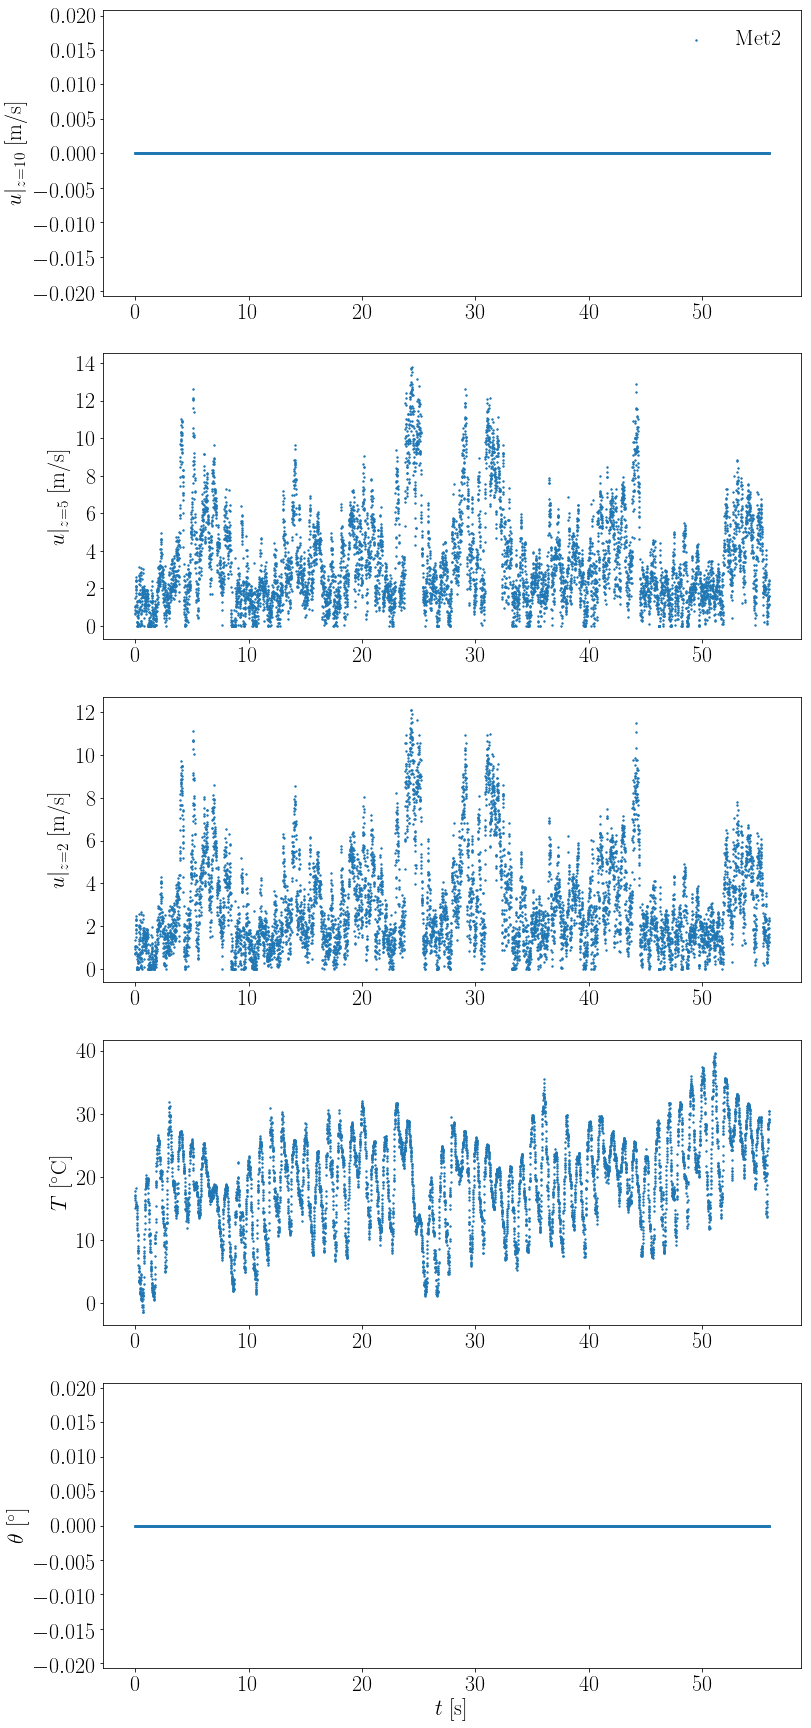

In [14]:
S=2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(511)

sc = ax.scatter(t1,u1_10,s=S,label='Met2')

ax.legend(loc=1,frameon=False,fontsize=22)
ax.set_ylabel('$u|_{z=10}$ [m/s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(512)

sc = ax.scatter(t1,u1_05,s=S,label='Met1')

ax.set_ylabel('$u|_{z=5}$ [m/s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(513)

sc = ax.scatter(t1,u1_02,s=S,label='Met1')

ax.set_ylabel('$u|_{z=2}$ [m/s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(514)

sc = ax.scatter(t1,T1,s=S,label='Met1')

ax.set_ylabel('$T$ [$^\circ$C]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(515)

sc = ax.scatter(t1,a1,s=S,label='Met1')

ax.set_ylabel('$\\theta$ [$^\circ$]',fontsize=22)
ax.set_xlabel('$t$ [s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


fig = plt.gcf()
fig.set_size_inches(12.5, 30.5, forward=True)

In [128]:
inv_in = int(time.mktime(datetime.datetime.strptime("2017-08-02 14:40:00",'%Y-%m-%d %H:%M:%S').timetuple()))
inv_fi = int(time.mktime(datetime.datetime.strptime("2017-08-02 16:30:00",'%Y-%m-%d %H:%M:%S').timetuple()))

t1in_i = np.argmin(np.abs(t1-inv_in))
t1fi_i = np.argmin(np.abs(t1-inv_fi))

t3in_i = np.argmin(np.abs(t3-inv_in))
t3fi_i = np.argmin(np.abs(t3-inv_fi))

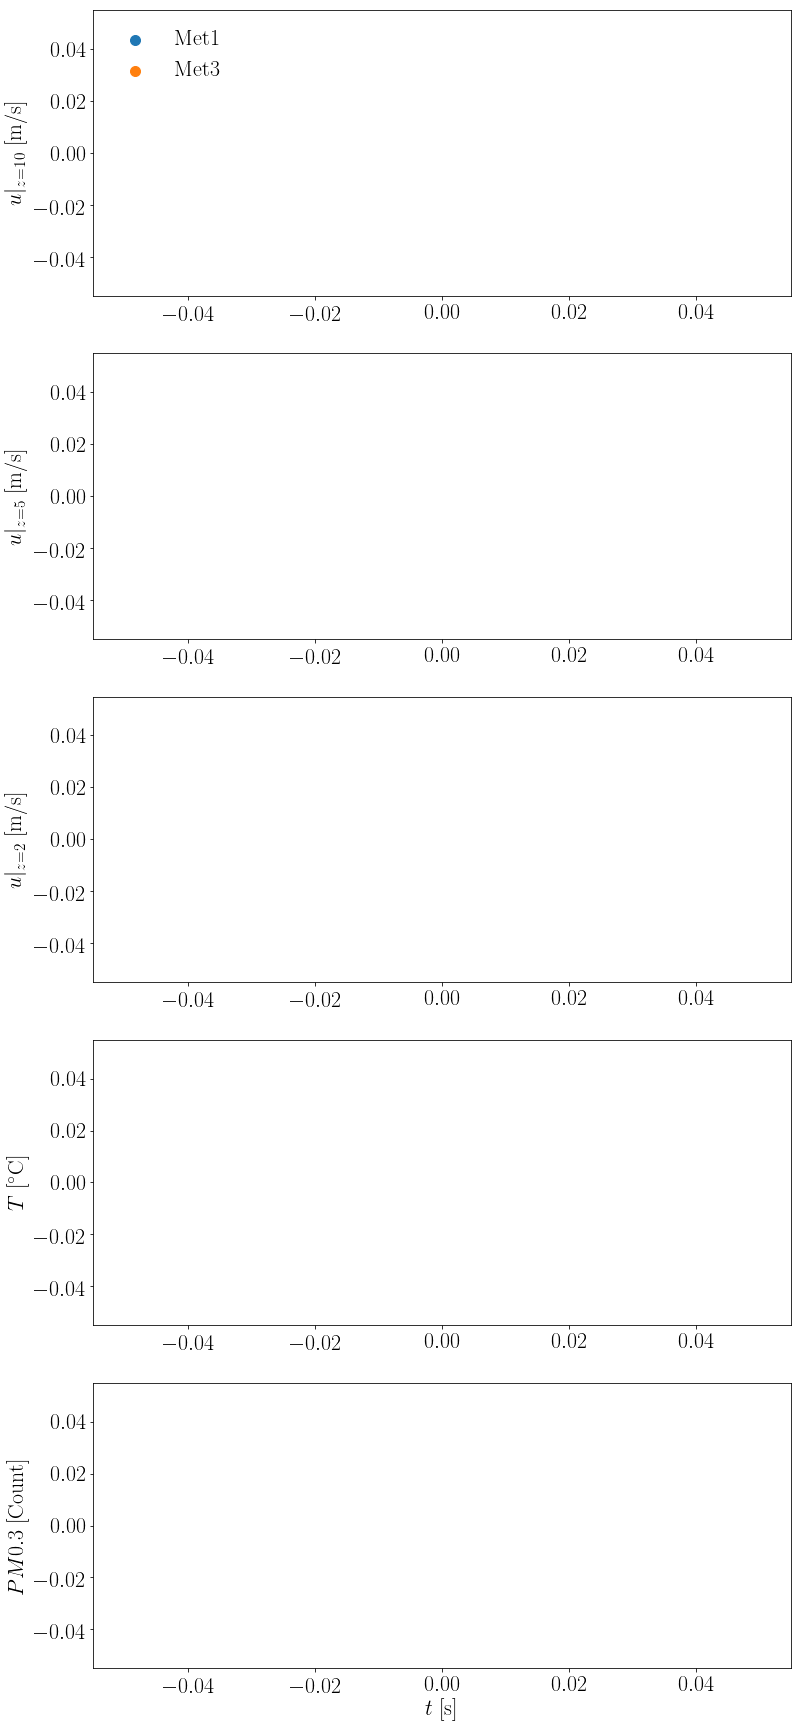

In [129]:
S=100
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(511)

sc = ax.scatter(t1[t1in_i:t1fi_i],u1_10[t1in_i:t1fi_i],s=S,label='Met1')
sc = ax.scatter(t3[t3in_i:t3fi_i],u3_10[t3in_i:t3fi_i],s=S,label='Met3')

ax.legend(loc=2,frameon=False,fontsize=22)
ax.set_ylabel('$u|_{z=10}$ [m/s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(512)

sc = ax.scatter(t1[t1in_i:t1fi_i],u1_05[t1in_i:t1fi_i],s=S,label='Met1')
sc = ax.scatter(t3[t3in_i:t3fi_i],u3_05[t3in_i:t3fi_i],s=S,label='Met3')

ax.set_ylabel('$u|_{z=5}$ [m/s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(513)

sc = ax.scatter(t1[t1in_i:t1fi_i],u1_02[t1in_i:t1fi_i],s=S,label='Met1')
sc = ax.scatter(t3[t3in_i:t3fi_i],u3_02[t3in_i:t3fi_i],s=S,label='Met3')

ax.set_ylabel('$u|_{z=2}$ [m/s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(514)

sc = ax.scatter(t1[t1in_i:t1fi_i],T1[t1in_i:t1fi_i],s=S,label='Met1')
sc = ax.scatter(t3[t3in_i:t3fi_i],T3[t3in_i:t3fi_i],s=S,label='Met3')

ax.set_ylabel('$T$ [$^\circ$C]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax = plt.subplot(515)

sc = ax.scatter(t1[t1in_i:t1fi_i],d1[t1in_i:t1fi_i],s=S,label='Met1')
sc = ax.scatter(t3[t3in_i:t3fi_i],d3[t3in_i:t3fi_i],s=S,label='Met3')

ax.set_ylabel('$PM0.3$ [Count]',fontsize=22)
ax.set_xlabel('$t$ [s]',fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


fig = plt.gcf()
fig.set_size_inches(12.5, 30.5, forward=True)

In [108]:
d3[t3in_i:t3fi_i+20]

array(['24377', '24157.3', '23968.1', '24124.3', '23702.1', '23731.1',
       '24126.5', '23801.6', '24007.9', '24397', '24258.1', '24612.7',
       '25659.2', '26014.2', '26411.3', '26476.4', '26097.7', '26448.6',
       '27662.8', '28008.4', '28093.6', '28122.2', '28159.6', '27699.5',
       '28218.6', '28800.6', '28987.9', '29088.5', '29128.4', '30822.9',
       '33826.1'], dtype=object)